# Case Study (Part-II)- Utkarsh Maheshwari

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data as Pandas Data Frame

In [2]:
data=pd.read_csv("Downloads/startup_funding.csv")
df=data.copy()
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [3]:
print(df.dtypes)

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
CityLocation        object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
Remarks             object
dtype: object


In [4]:
print(df.describe())

               SNo
count  2372.000000
mean   1185.500000
std     684.881742
min       0.000000
25%     592.750000
50%    1185.500000
75%    1778.250000
max    2371.000000


In [5]:
df.drop('SNo',axis=1,inplace=True)
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### Q1) Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [6]:
## Finding all indexes where city locations is bangalore and Delhi
id1=df[df['CityLocation']=='bangalore'].index
id2=df[df['CityLocation']=='Delhi'].index

df.loc[id1,'CityLocation']='Bangalore'
df.loc[id2,'CityLocation']='New Delhi'


In [7]:
#City_list will store number of strtups
city_list={'Mumbai':0,'NCR':0,'Bangalore':0}

ids=[]
for ind in df.index:
    if(pd.isnull(df['CityLocation'][ind])==False):
        city=df['CityLocation'][ind].split('/')
        city=[i.strip() for i in city]
        for i in city:
            if i=='Mumbai':
                city_list['Mumbai']+=1  #Increment startups in Mumbai
                ids.append(ind)
            if i=='Bangalore':
                city_list['Bangalore']+=1
                ids.append(ind)
            if (i=='Noida') or (i=='Gurgaon') or (i=='New Delhi'):
                city_list['NCR']+=1
                ids.append(ind)
                
## sorted dictionary
sorted_city = sorted(city_list.items() , reverse=True, key=lambda x: x[1])

## result
print("CITY #Startups\n")
for elem in sorted_city:
    print(elem[0], elem[1])

CITY #Startups

NCR 709
Bangalore 637
Mumbai 449


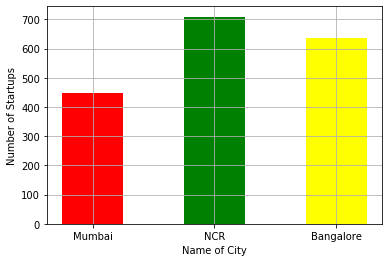

In [8]:
plt.bar(city_list.keys(),city_list.values(),color=['red','green','yellow'],width=0.5)
plt.xlabel("Name of City")
plt.ylabel("Number of Startups")
plt.grid()
plt.show()

###  >>>Based on Number of Startups in a city, NCR region should be selected

### Q2) Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [9]:
df2=df.copy()

In [10]:
df2.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [11]:
mk={} ##dictionary will hold number of investments by a investor
for ind in df2.index:
    if(pd.isnull(df2['InvestorsName'][ind])==False):  ##Do not process NaN values
        inv_list=str(df2['InvestorsName'][ind]).split(',')  ## All investors for one startup are now in inv_list 
        inv_list=[s.strip() for s in inv_list]
        for inv in inv_list:  ##for each investor update its count in dictionary mk
            if(inv!=''):  ##ignore undisclosed investor
                if inv in mk:
                    mk[inv]+=1
                else:
                    mk[inv]=1

In [12]:
sorted_mk = sorted(mk.items() , reverse=True, key=lambda x: x[1])
count=1
print("Inv Name   Inv Number ")
inv_name=[]
inv_numb=[]
for elem in sorted_mk:
    if(count<=5):
        print(elem[0], elem[1])
        inv_name.append(elem[0])
        inv_numb.append(elem[1])
        count+=1

Inv Name   Inv Number 
Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


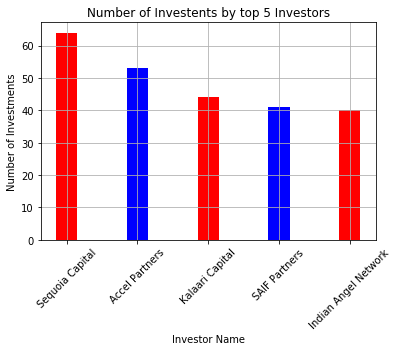

In [13]:
plt.bar(inv_name,inv_numb,color=['red','blue','red','blue','red'],width=0.3)
plt.xlabel("Investor Name")
plt.ylabel("Number of Investments")
plt.title('Number of Investents by top 5 Investors')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### >>>Largest number of investments are done by:
1)Sequoia Capitals
2)Accel Partners
3)Kalaari Capital
4)SAIF Partners
5)Indian Angel Network

### Q3) After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [14]:
df2.head(10)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


In [15]:
##Correcting Startup Names

id1=df2[df2["StartupName"]=='Ola Cabs'].index
id2=df2[df2["StartupName"]=='Olacabs'].index
df2.loc[id1,"StartupName"]="Ola"
df2.loc[id2,"StartupName"]="Ola"

id1=df2[df2["StartupName"]=='Oyo Rooms'].index
id2=df2[df2["StartupName"]=='OyoRooms'].index
id3=df2[df2["StartupName"]=='Oyorooms'].index
id4=df2[df2["StartupName"]=='OYO Rooms'].index
df2.loc[id1,"StartupName"]="Oyo"
df2.loc[id2,"StartupName"]="Oyo"
df2.loc[id3,"StartupName"]="Oyo"
df2.loc[id4,"StartupName"]="Oyo"

id4=df2[df2["StartupName"]=='Flipkart.com'].index
df2.loc[id4,"StartupName"]="Flipkart"

id4=df[df["StartupName"]=='Paytm Marketplace'].index
df.loc[id4,"StartupName"]="Paytm"

In [16]:
df2.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [18]:
###chk list will contain name of investor and name of startup ,investor has invested in 
##this list will be having multiple investments by a investor in same startup
chk=[]
for ind in df2.index:
    if(pd.isnull(df2['InvestorsName'][ind])==False) and (df2['InvestorsName'][ind]!=''):
        
        inv_list=str(df2['InvestorsName'][ind]).split(',')
        for inv in inv_list:
            temp=[]
            temp.append(inv.strip())
            temp.append(str(df2['StartupName'][ind]).strip())
            chk.append(temp)

Inv Name   Inv Number 
Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


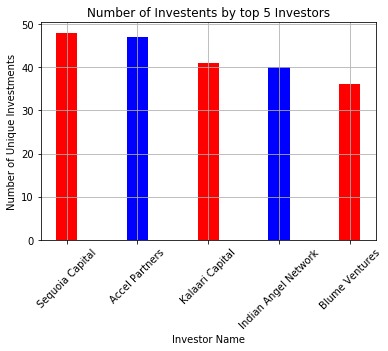

In [19]:
mk={}
a=np.array(chk)
a=np.unique(a,axis=0) ### this will eliminate all repeated investments by a investor in same startup
for i in a:
    key =i[0]
    if key !='':
        if key in mk:
            mk[key]+=1
        else:
            mk[key]=1
sorted_mk = sorted(mk.items() , reverse=True, key=lambda x: x[1])
count=1
print("Inv Name   Inv Number ")
inv_name=[]
inv_numb=[]
for elem in sorted_mk:
    if(count<=5):
        print(elem[0], elem[1])
        inv_name.append(elem[0])
        inv_numb.append(elem[1])
        count+=1
plt.bar(inv_name,inv_numb,color=['red','blue','red','blue','red'],width=0.3)
plt.xlabel("Investor Name")
plt.ylabel("Number of Unique Investments")
plt.title('Number of Investents by top 5 Investors')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### >>>Based on number of different investents top 5 investors are:
1)Seqouia Capital
2)accel partners
3)kalaari capital
4)indian angel network
5) Blume ventures

### Q4) Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [20]:
df2['InvestmentType'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [22]:
df.index

RangeIndex(start=0, stop=2372, step=1)

In [23]:
##Correcting all spelling errors in Investment Type
id1=df2[df2['InvestmentType']=='SeedFunding'].index
id2=df2[df2['InvestmentType']=='PrivateEquity'].index
id3=df2[df2['InvestmentType']=='Crowd funding'].index

df2.loc[id1,'InvestmentType']='Seed Funding'
df2.loc[id2,'InvestmentType']='Private Equity'
df2.loc[id3,'InvestmentType']='Crowd Funding'

In [24]:
df2['InvestmentType'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'Crowd Funding'], dtype=object)

In [25]:
ids=df2[(df2['InvestmentType']=='Seed Funding') | (df2['InvestmentType']=='Crowd Funding')].index
print(ids)
df3=(df2.loc[ids,:]).copy()
df3
## df3 only has data where investment type is Seed Funding or Crowd Funding

Int64Index([   2,    3,    4,    5,   11,   12,   13,   14,   17,   18,
            ...
            2348, 2349, 2352, 2354, 2355, 2356, 2357, 2358, 2362, 2371],
           dtype='int64', length=1303)


,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
11,06/07/2017,Minjar,Technology,Cloud Solutions provider,Bangalore,"Blume Ventures, Contrarian Capital India Partn...",Seed Funding,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2356,21/05/2015,Villgro,NaN,NaN,NaN,Michael & Susan Dell Foundation,Seed Funding,"3,250,000",To fund edu startups
2357,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"200,000",NaN
2358,22/01/2015,Freshmonk,NaN,NaN,NaN,"August Capital Partners, Michael Blakey",Seed Funding,NaN,NaN
2362,24/01/2015,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,"1,500,000",NaN


Inv Name   Inv Number 
Indian Angel Network 33
Rajan Anandan 23
Anupam Mittal 16
LetsVenture 16
Group of Angel Investors 14


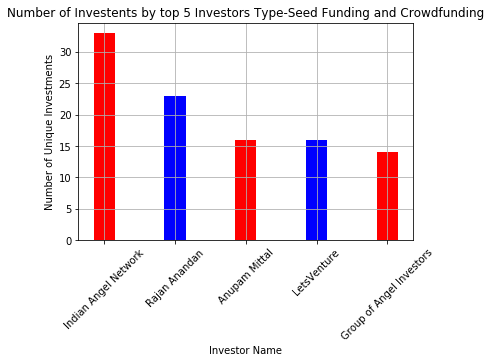

In [32]:
chk=[]
for ind in df3.index:
    if(pd.isnull(df3['InvestorsName'][ind])==False) and (df3['InvestorsName'][ind]!=''):
        
        inv_list=str(df3['InvestorsName'][ind]).split(',')
        for inv in inv_list:
            if "undisclosed investors" not in inv.casefold():
                temp=[]
                temp.append(inv.strip())
                temp.append(str(df3['StartupName'][ind]).strip())
                chk.append(temp)
mk={}
a=np.array(chk)
a=np.unique(a,axis=0)
for i in a:
    key =i[0]
    if key !='':
        if key in mk:
            mk[key]+=1
        else:
            mk[key]=1
sorted_mk = sorted(mk.items() , reverse=True, key=lambda x: x[1])
count=1
print("Inv Name   Inv Number ")
inv_name=[]
inv_numb=[]
for elem in sorted_mk:
    if(count<=5):
        print(elem[0], elem[1])
        inv_name.append(elem[0])
        inv_numb.append(elem[1])
        count+=1
plt.bar(inv_name,inv_numb,color=['red','blue','red','blue','red'],width=0.3)
plt.xlabel("Investor Name")
plt.ylabel("Number of Unique Investments")
plt.title('Number of Investents by top 5 Investors Type-Seed Funding and Crowdfunding')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Top investors in crowd and seed funding are :
1)Indian Angel Network
2)Rajan Anandam
3)Anupam Mittal
4)LetsVenture
5)Group of Angel Investors

###  Q5)Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [34]:
df2.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [35]:
df2['InvestmentType'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'Crowd Funding'], dtype=object)

In [36]:
df2.dropna(subset=['InvestorsName'],inplace=True)

In [37]:
# create df4 with only Private Equity
ids=df2[df2['InvestmentType']=='Private Equity'].index
print(ids)
df4=(df2.loc[ids,:]).copy()
df4


Int64Index([   0,    1,    6,    7,    8,    9,   10,   15,   16,   19,
            ...
            2360, 2361, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370],
           dtype='int64', length=1066)


,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
...,...,...,...,...,...,...,...,...,...
2366,28/01/2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,"2,500,000",Series A
2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN


Inv Name   Inv Number 
Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


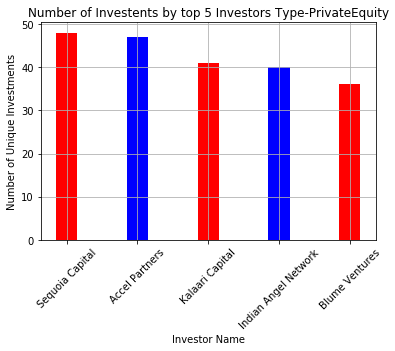

In [38]:
chk=[]
for ind in df2.index:
    if(pd.isnull(df2['InvestorsName'][ind])==False) and (df2['InvestorsName'][ind]!=''):
        
        inv_list=str(df2['InvestorsName'][ind]).split(',')
        for inv in inv_list:
            if "undisclosed investors" not in inv.casefold():
                temp=[]
                temp.append(inv.strip())
                temp.append(str(df2['StartupName'][ind]).strip())
                chk.append(temp)
mk={}
a=np.array(chk)
a=np.unique(a,axis=0)
for i in a:
    key =i[0]
    if key !='':
        if key in mk:
            mk[key]+=1
        else:
            mk[key]=1
sorted_mk = sorted(mk.items() , reverse=True, key=lambda x: x[1])
count=1
print("Inv Name   Inv Number ")
inv_name=[]
inv_numb=[]
for elem in sorted_mk:
    if(count<=5):
        print(elem[0], elem[1])
        inv_name.append(elem[0])
        inv_numb.append(elem[1])
        count+=1
plt.bar(inv_name,inv_numb,color=['red','blue','red','blue','red'],width=0.3)
plt.xlabel("Investor Name")
plt.ylabel("Number of Unique Investments")
plt.title('Number of Investents by top 5 Investors Type-PrivateEquity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### >>> Top 5 private equity investors are
1)Sequoia Capital
2)Accel PArtners
3)Kalaari Capital
4)Indian Angel Network
5)Blume Ventures

